In [20]:
import pandas as kunfu
import numpy as dragon
import pylab as p
import matplotlib.pyplot as plot
from collections import Counter
import re
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error

In [22]:
train = kunfu.read_csv("https://raw.githubusercontent.com/benvictoria17/pandas/master/dataset/Bitcoin%20Price%20Prediction%20(LightWeight%20CSV)/bitcoin_price_Training%20-%20Training.csv", parse_dates=["Date"]).fillna(0)
print(train.head())

        Date     Open     High      Low    Close         Volume  \
0 2017-07-31  2763.24  2889.62  2720.61  2875.34    860,575,000   
1 2017-07-30  2724.39  2758.53  2644.85  2757.18    705,943,000   
2 2017-07-29  2807.02  2808.76  2692.80  2726.45    803,746,000   
3 2017-07-28  2679.73  2897.45  2679.73  2809.01  1,380,100,000   
4 2017-07-27  2538.71  2693.32  2529.34  2671.78    789,104,000   

       Market Cap  
0  45,535,800,000  
1  44,890,700,000  
2  46,246,700,000  
3  44,144,400,000  
4  41,816,500,000  


In [24]:
data = train["Close"]
Date1 = train["Date"]

In [25]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1556 non-null   datetime64[ns]
 1   Open        1556 non-null   float64       
 2   High        1556 non-null   float64       
 3   Low         1556 non-null   float64       
 4   Close       1556 non-null   float64       
 5   Volume      1556 non-null   object        
 6   Market Cap  1556 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 85.2+ KB
None


In [26]:
train1 = train[['Date','Close']]
train1.head()

,Date,Close
0,2017-07-31,2875.34
1,2017-07-30,2757.18
2,2017-07-29,2726.45
3,2017-07-28,2809.01
4,2017-07-27,2671.78


In [27]:
train2 = train1.set_index('Date')
train2.sort_index(inplace=True)
print (type(train2))
print (train2.head())

<class 'pandas.core.frame.DataFrame'>
             Close
Date              
2013-04-28  134.21
2013-04-29  144.54
2013-04-30  139.00
2013-05-01  116.99
2013-05-02  105.21


Text(0.5, 1.0, 'Closing price distribution of bitcoin')

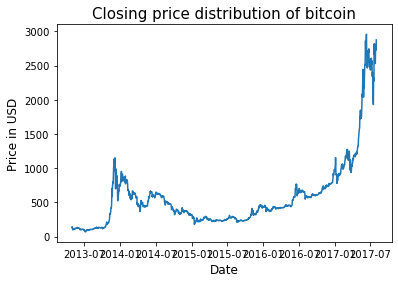

In [28]:
plot.plot(train2)
plot.xlabel('Date', fontsize=12)
plot.ylabel('Price in USD', fontsize=12)
plot.title("Closing price distribution of bitcoin", fontsize=15)

In [29]:
plt.show()

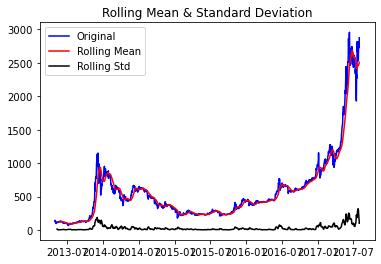

ADF Stastistic: 2.535589
p-value: 0.999060
The graph is non stationery
Critical values:
	1%: -3.435 
	5%: -2.863 
	10%: -2.568 


In [30]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(x):


    #Determing rolling statistics
    rolmean = x.rolling(window=22,center=False).mean()

    rolstd = x.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    orig = plot.plot(x, color='blue',label='Original')
    mean = plot.plot(rolmean, color='red', label='Rolling Mean')
    std = plot.plot(rolstd, color='black', label = 'Rolling Std')
    plot.legend(loc='best')
    plot.title('Rolling Mean & Standard Deviation')
    plot.show(block=False)
    
    #Perform Dickey Fuller test    
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationery")
            break
         else:
            print("The graph is stationery")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))
        
ts = train2['Close']      
test_stationarity(ts)

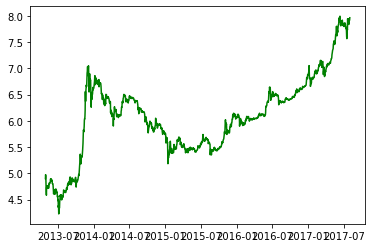

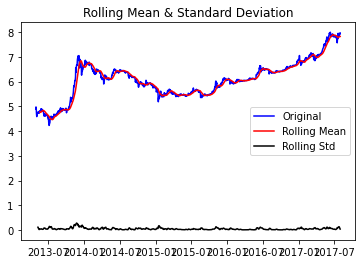

ADF Stastistic: -0.790465
p-value: 0.821907
The graph is non stationery
Critical values:
	1%: -3.435 
	5%: -2.863 
	10%: -2.568 


In [31]:
ts_log = dragon.log(ts)
plot.plot(ts_log,color="green")
plot.show()

test_stationarity(ts_log)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


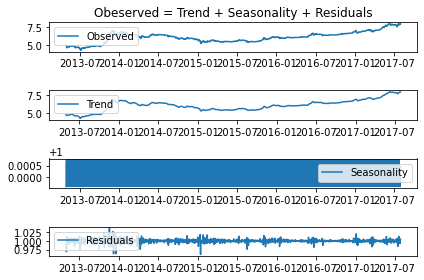

In [32]:

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative',freq = 7)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plot.subplot(411)
plot.title('Obeserved = Trend + Seasonality + Residuals')
plot.plot(ts_log,label='Observed')
plot.legend(loc='best')
plot.subplot(412)
plot.plot(trend, label='Trend')
plot.legend(loc='best')
plot.subplot(413)
plot.plot(seasonal,label='Seasonality')
plot.legend(loc='best')
plot.subplot(414)
plot.plot(residual, label='Residuals')
plot.legend(loc='best')
plot.tight_layout()
plot.show()

In [33]:
ts_log_decompose = residual

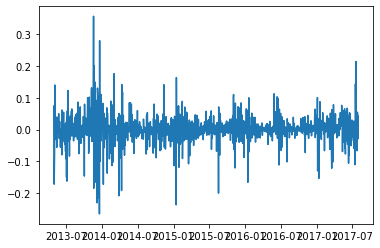

In [34]:
ts_log_diff = ts_log - ts_log.shift()
plot.plot(ts_log_diff)
plot.show()

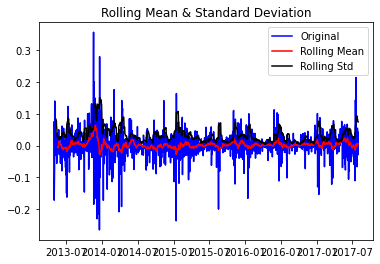

ADF Stastistic: -7.285034
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.435 
	5%: -2.863 
	10%: -2.568 


In [35]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:669: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


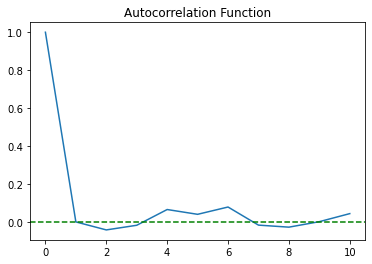

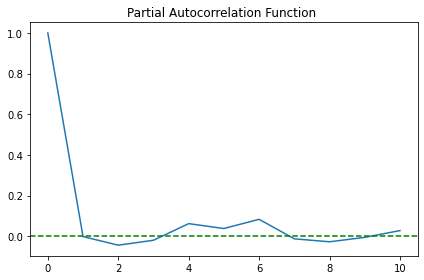

In [36]:
#ACF and PACF plots
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

lag_acf = acf(ts_log_diff, nlags=10)
lag_pacf = pacf(ts_log_diff, nlags=10, method='ols')

#Plot ACF: 
plot.subplot(1,1,1)

plot.plot(lag_acf)
#print(lag_acf[0.5])

plot.axhline(y=0,linestyle='--',color='g')
plot.title('Autocorrelation Function')
plot.show()

#Plot PACF:
plot.subplot(1,1,1)
plot.plot(lag_pacf)

plot.axhline(y=0,linestyle='--',color='green')
plot.title('Partial Autocorrelation Function ')
plot.tight_layout()
plot.show()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be use

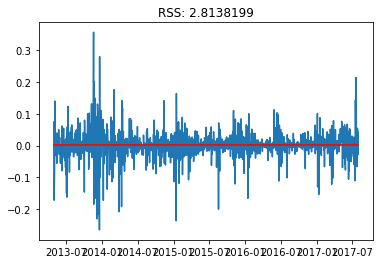

In [37]:
model = ARIMA(ts_log, order=(1,1,0))  
results_ARIMA = model.fit(disp=-1)  
plot.plot(ts_log_diff)
plot.plot(results_ARIMA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
plot.show()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


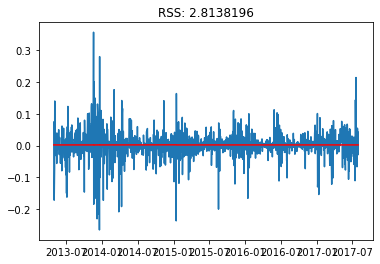

In [38]:
model = ARIMA(ts_log, order=(0,1,1))  
results_MA = model.fit(disp=-1)  
plot.plot(ts_log_diff)
plot.plot(results_MA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_MA.fittedvalues-ts_log_diff)**2))
plot.show()

In [39]:
print(results_MA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1555
Model:                 ARIMA(0, 1, 1)   Log Likelihood                2703.220
Method:                       css-mle   S.D. of innovations              0.043
Date:                Mon, 15 Mar 2021   AIC                          -5400.441
Time:                        18:53:55   BIC                          -5384.393
Sample:                    04-29-2013   HQIC                         -5394.473
                         - 07-31-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0020      0.001      1.829      0.067      -0.000       0.004
ma.L1.D.Close    -0.0012      0.027     -0.045      0.964      -0.053       0.051
                                    Root

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be use

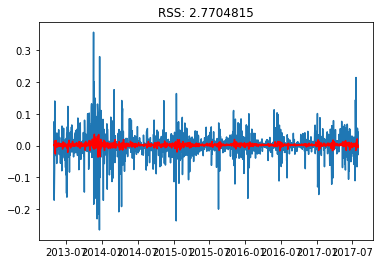

In [40]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log, order=(8,1,0))  
results_ARIMA = model.fit(disp=-1)  
plot.plot(ts_log_diff)
plot.plot(results_ARIMA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
plot.show()

In [42]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
print(results_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1555
Model:                 ARIMA(8, 1, 0)   Log Likelihood                2715.504
Method:                       css-mle   S.D. of innovations              0.042
Date:                Mon, 15 Mar 2021   AIC                          -5411.009
Time:                        18:54:29   BIC                          -5357.516
Sample:                    04-29-2013   HQIC                         -5391.117
                         - 07-31-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0020      0.001      1.662      0.096      -0.000       0.004
ar.L1.D.Close    -0.0056      0.025     -0.221      0.825      -0.055       0.044
ar.L2.D.Close    -0.0432      0.025     

In [43]:
size = int(len(ts_log)-100)
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
for t in range(len(test_arima)):
    model = ARIMA(history, order=(2, 1, 0))
    model_fit = model.fit(disp=-1)
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t]
    history.append(original_value)
    
    pred_value = dragon.exp(pred_value)
    
    
    original_value = dragon.exp(original_value)
    
    
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))
    
    #error = mean_squared_error(dragon.exp(yhat), dragon.exp(obs))
    #print('mean_squared_error : ', error)
print('\n Means Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')

Printing Predicted vs Expected Values...


predicted = 1234.001728,   expected = 1207.210000,   error = 2.219310  %
predicted = 1208.696082,   expected = 1250.150000,   error = 3.315915  %


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted = 1253.283973,   expected = 1265.490000,   error = 0.964530  %
predicted = 1265.426020,   expected = 1281.080000,   error = 1.221936  %
predicted = 1282.403186,   expected = 1317.730000,   error = 2.680884  %
predicted = 1319.094450,   expected = 1316.480000,   error = 0.198594  %
predicted = 1316.894868,   expected = 1321.790000,   error = 0.370341  %
predicted = 1324.010590,   expected = 1347.890000,   error = 1.771614  %
predicted = 1349.835125,   expected = 1421.600000,   error = 5.048176  %
predicted = 1422.645720,   expected = 1452.820000,   error = 2.076946  %
predicted = 1451.673009,   expected = 1490.090000,   error = 2.578166  %
predicted = 1491.152147,   expected = 1537.670000,   error = 3.025217  %
predicted = 1538.563602,   expected = 1555.450000,   error = 1.085628  %
predicted = 1555.928853,   expected = 1578.800000,   error = 1.448641  %
predicted = 1580.749565,   expected = 1596.710000,   error = 0.999583  %
predicted = 1598.443559,   expected = 1723.350000, 

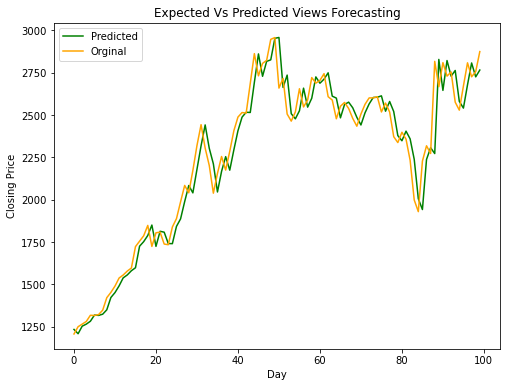

In [44]:
plot.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, originals, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Closing Price')
plot.legend(labels)
plot.show()

In [45]:
""""plot.figure(figsize=(8, 6))
test_day = [t+450
                for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'red')
plot.plot(Date1, ts)
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Date')
plot.ylabel('Closing Prices')
plot.legend(labels)
plot.show()
"""

'"plot.figure(figsize=(8, 6))\ntest_day = [t+450\n                for t in range(len(test_arima))]\nlabels={\'Orginal\',\'Predicted\'}\nplot.plot(test_day, predictions, color= \'red\')\nplot.plot(Date1, ts)\nplot.title(\'Expected Vs Predicted Views Forecasting\')\nplot.xlabel(\'Date\')\nplot.ylabel(\'Closing Prices\')\nplot.legend(labels)\nplot.show()\n'

In [46]:
test = kunfu.read_csv("https://raw.githubusercontent.com/benvictoria17/pandas/master/dataset/Bitcoin%20Price%20Prediction%20(LightWeight%20CSV)/bitcoin_price_1week_Test%20-%20Test.csv",index_col= 'Date')
test.index = kunfu.to_datetime(test.index)
test = test['Close']
test = test.sort_index()
print(test)

Date
2017-08-01    2718.26
2017-08-02    2710.67
2017-08-03    2804.73
2017-08-04    2895.89
2017-08-05    3252.91
2017-08-06    3213.94
2017-08-07    3378.94
Name: Close, dtype: float64
